In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds

%matplotlib inline  

In [2]:
cac40_symbol = "^FCHI"
b = tsds.load_yahoo_stock_price(cac40_symbol)
df = b.mPastData

In [3]:
df.sample(4)

,^FCHI,Date
1121,4441.870117,2016-08-26
2,3237.689941,2012-04-11
85,3453.280029,2012-08-07
896,4688.700195,2015-10-12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 2 columns):
^FCHI    1271 non-null float64
Date     1271 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.9 KB


In [5]:

lEngine = autof.cForecastEngine()
lEngine

H = 12;
# lEngine.mOptions.enable_slow_mode();
# lEngine.mOptions.mDebugPerformance = True;
lEngine.train(df , 'Date' , cac40_symbol, H);



In [6]:
lEngine.getModelInfo();



In [7]:
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());



  Transformation                                              Model  \
0         _^FCHI    _^FCHI_Lag1Trend_residue_zeroCycle_residue_NoAR   
1         _^FCHI  _^FCHI_Lag1Trend_residue_bestCycle_byL2_residu...   
2   CumSum_^FCHI  CumSum_^FCHI_Lag1Trend_residue_zeroCycle_resid...   
3     Diff_^FCHI  Diff_^FCHI_Lag1Trend_residue_zeroCycle_residue...   
4  RelDiff_^FCHI  RelDiff_^FCHI_Lag1Trend_residue_zeroCycle_resi...   

   Complexity  FitCount       FitL2  FitMAPE  ForecastCount  ForecastL2  \
0          32      1007   51.404508   0.0092            252   47.507304   
1          40      1007   51.261535   0.0091            252   47.423443   
2          64      1007  113.635526   0.0101            252   47.507304   
3          64      1007   51.404508   0.0092            252   47.507304   
4          64      1007   51.404508   0.0092            252   47.507304   

   ForecastMAPE  TestCount     TestL2  TestMAPE  
0        0.0074         12  19.266754    0.0034  
1        0.0074       

In [8]:
lEngine.mSignalDecomposition.mBestModel.mTimeInfo.mResolution



4

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1403: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


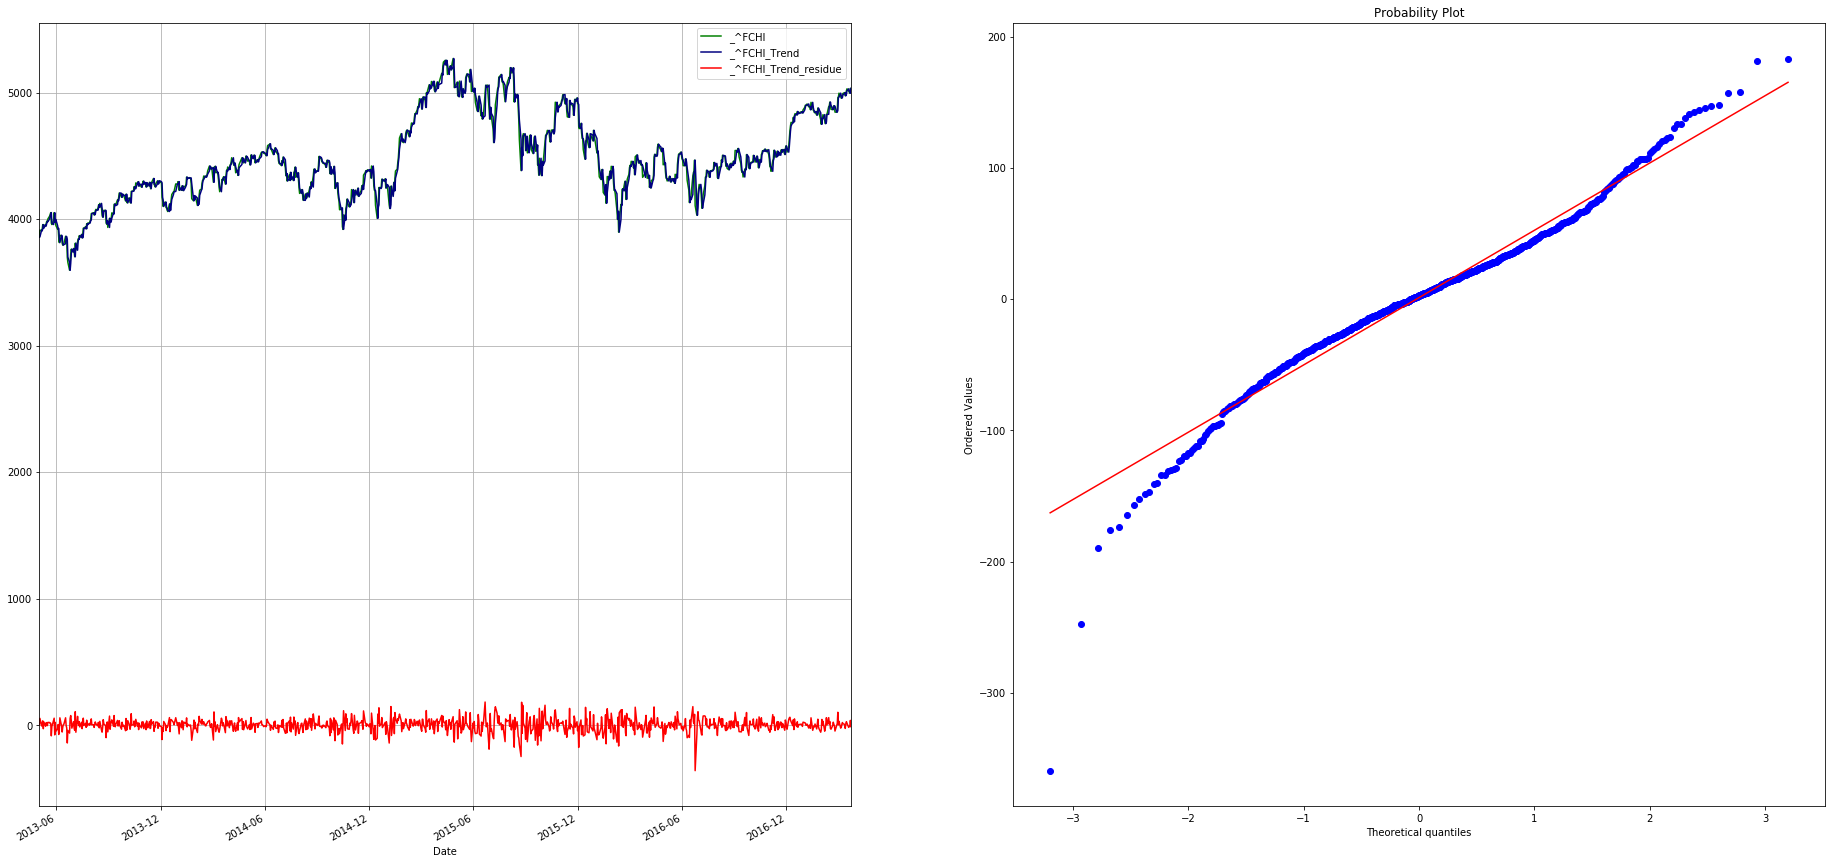

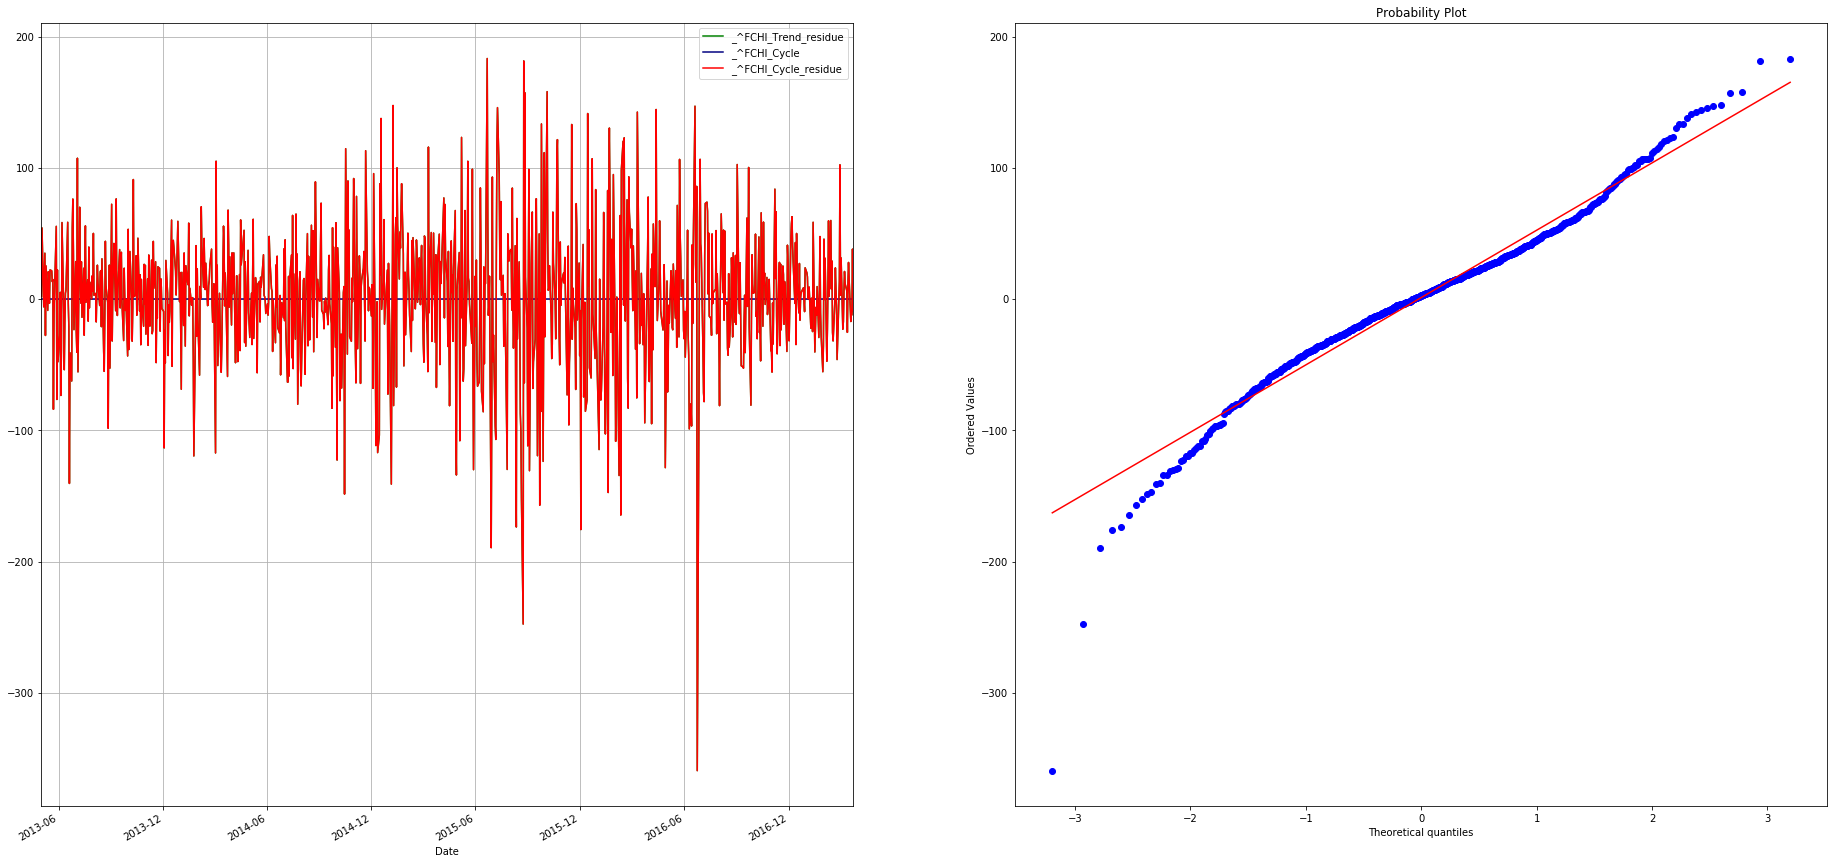

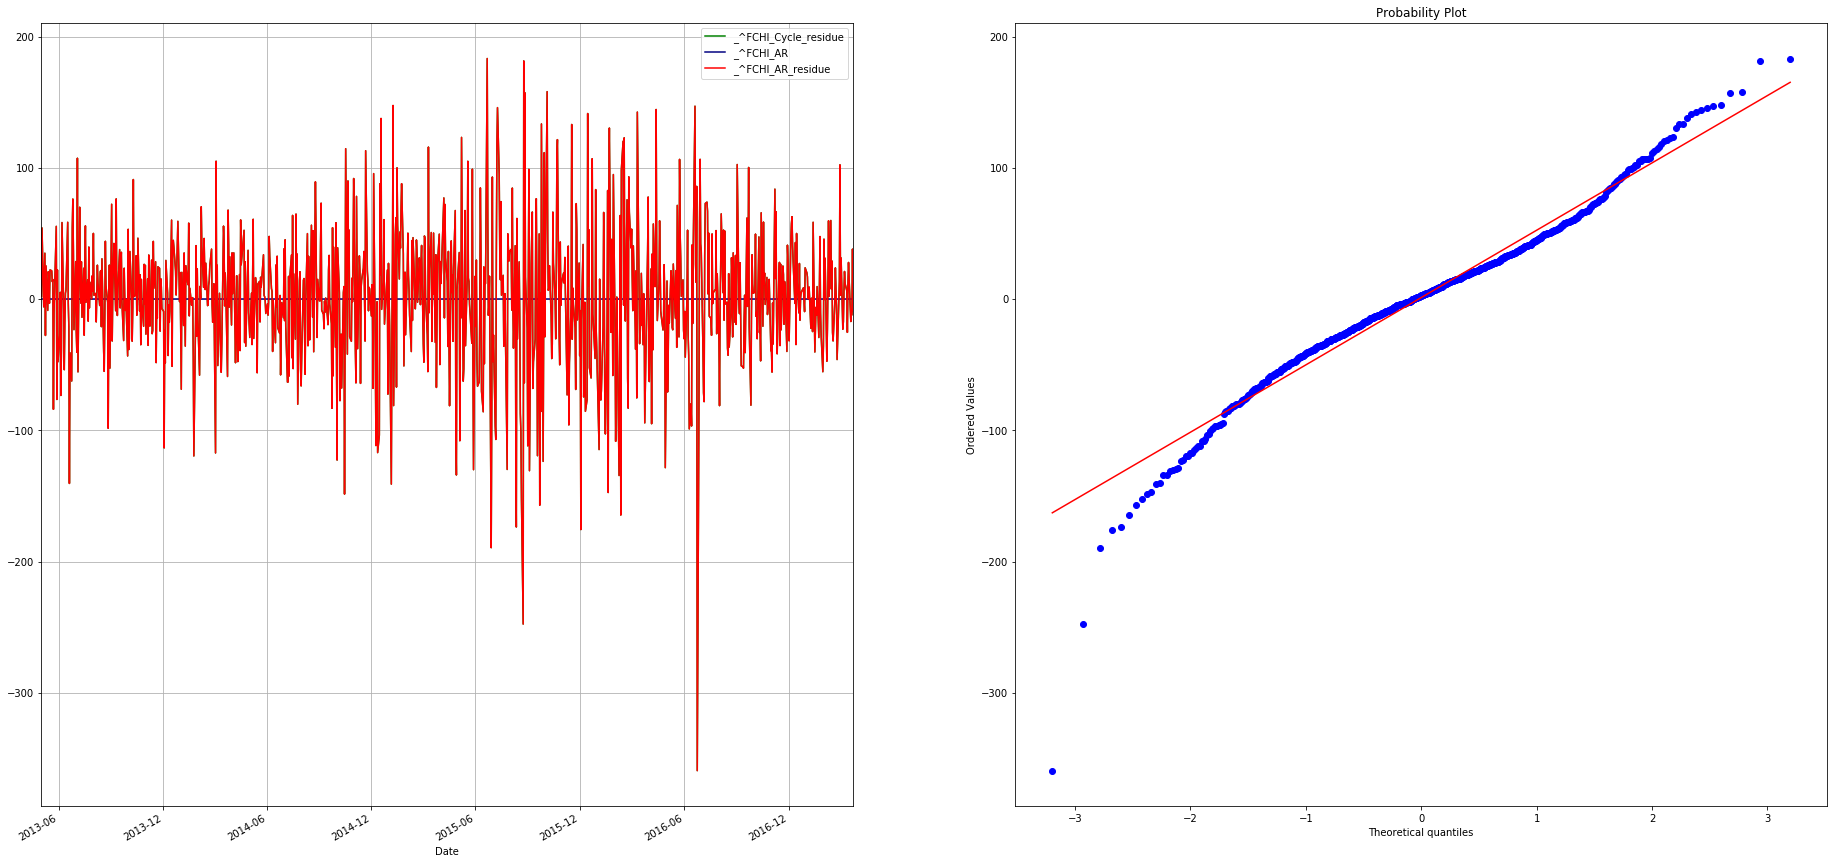

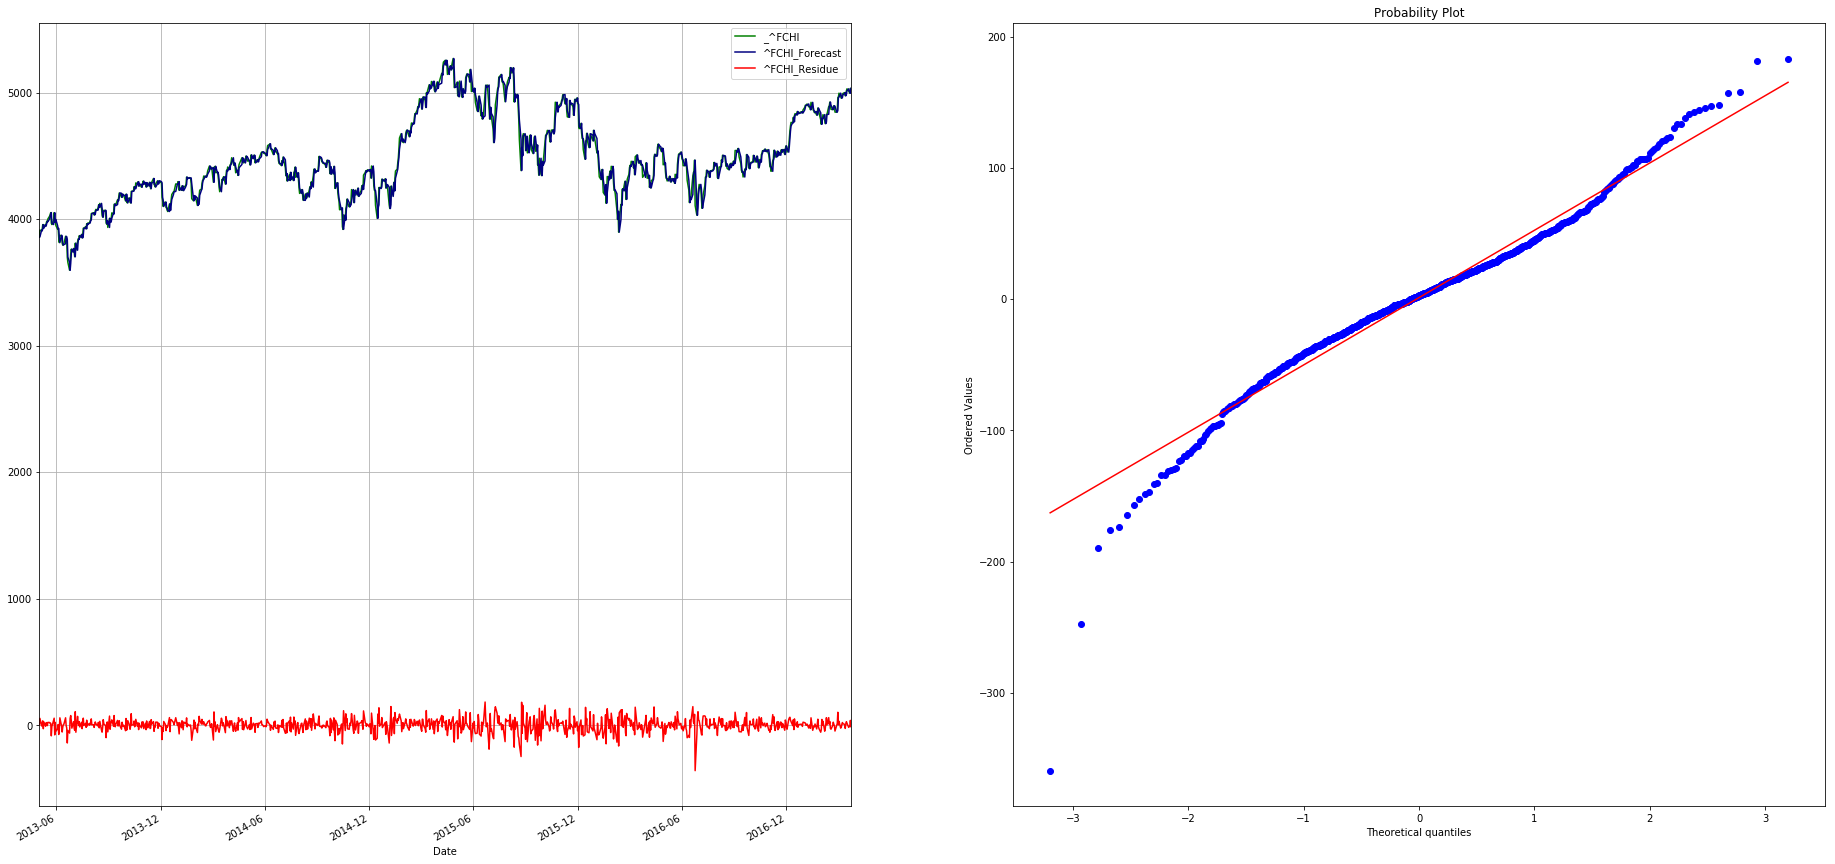

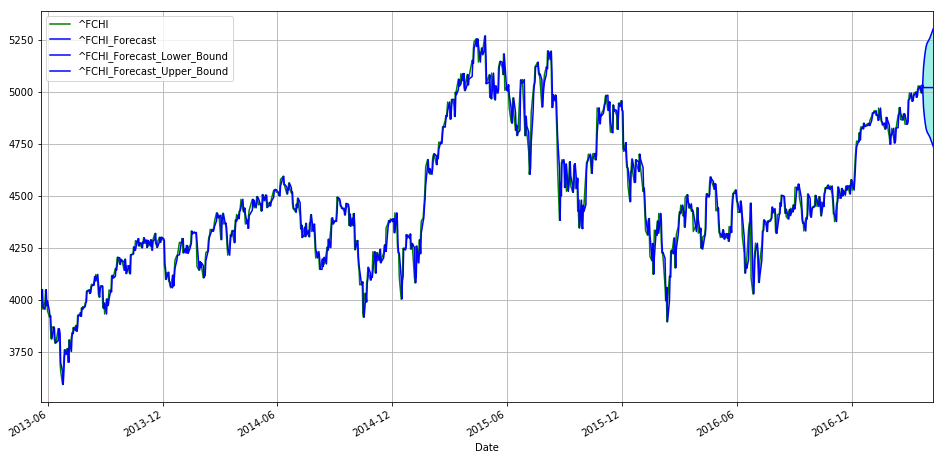

In [9]:
lEngine.standrdPlots();